In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [8]:
data = pd.read_csv("Microfinance_Dataset.csv")
data.shape

(614, 13)

In [9]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [201]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
data = data.drop(['Loan_ID'], axis = 1)

In [12]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [14]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [15]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


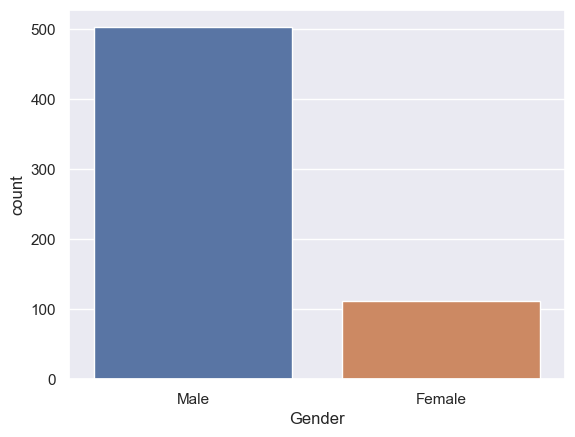

Percentage of Male applicant: 81.76%
Percentage of Female applicant: 18.24%


In [154]:
sns.countplot(x="Gender", data=data)
plt.show()

data.Gender.value_counts(dropna=False)
countMale = len(data[data.Gender == 'Male'])
countFemale = len(data[data.Gender == 'Female'])
countNull = len(data[data.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(data.Gender)) * 100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(data.Gender)) * 100)))

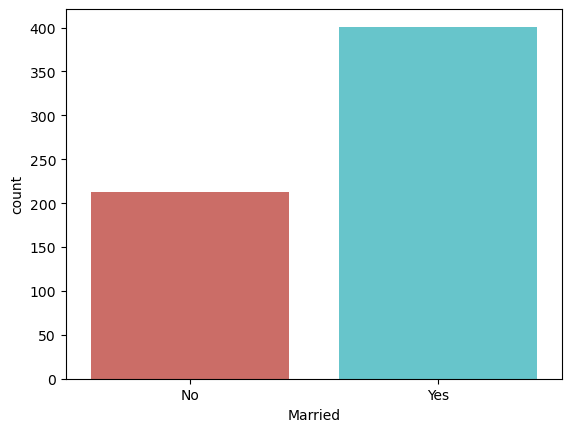

Percentage of married: 65.31%
Percentage of Not married applicant: 34.69%


In [56]:
sns.countplot(x="Married", data=data, palette="hls")
plt.show()

data.Married.value_counts(dropna=False)

countMarried = len(data[data.Married == 'Yes'])
countNotMarried = len(data[data.Married == 'No'])
countNull = len(data[data.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(data.Married)) * 100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(data.Married)) * 100)))

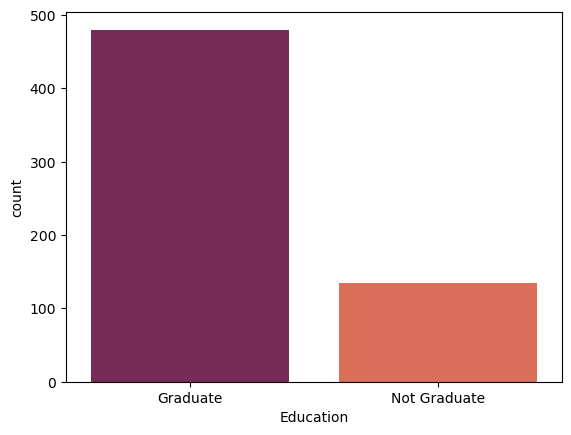

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


In [57]:
sns.countplot(x="Education", data=data, palette="rocket")
plt.show()

data.Education.value_counts(dropna=False)

countGraduate = len(data[data.Education == 'Graduate'])
countNotGraduate = len(data[data.Education == 'Not Graduate'])
countNull = len(data[data.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(data.Education)) * 100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(data.Education)) * 100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.Education)) * 100)))

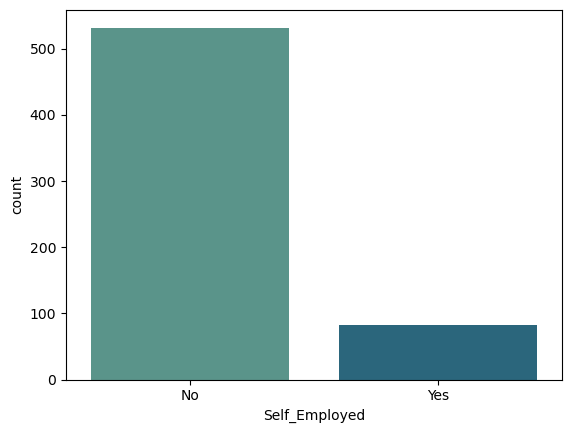

Percentage of Not self employed: 86.64%
Percentage of self employed: 13.36%


In [59]:
sns.countplot(x="Self_Employed", data=data, palette="crest")
plt.show()

data.Self_Employed.value_counts(dropna=False)

countNo = len(data[data.Self_Employed == 'No'])
countYes = len(data[data.Self_Employed == 'Yes'])
countNull = len(data[data.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(data.Self_Employed)) * 100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(data.Self_Employed)) * 100)))

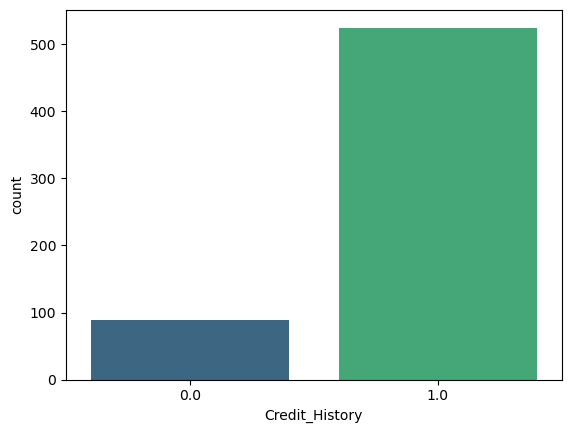

Percentage of Good credit history: 85.50%
Percentage of Bad credit history: 14.50%


In [60]:
sns.countplot(x="Credit_History", data=data, palette="viridis")
plt.show()

data.Credit_History.value_counts(dropna=False)

count1 = len(data[data.Credit_History == 1])
count0 = len(data[data.Credit_History == 0])
countNull = len(data[data.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(data.Credit_History)) * 100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(data.Credit_History)) * 100)))

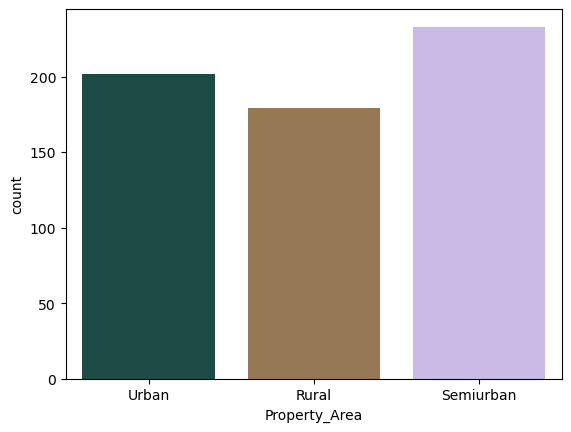

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%


In [61]:
sns.countplot(x="Property_Area", data=data, palette="cubehelix")
plt.show()

data.Property_Area.value_counts(dropna=False)

countUrban = len(data[data.Property_Area == 'Urban'])
countRural = len(data[data.Property_Area == 'Rural'])
countSemiurban = len(data[data.Property_Area == 'Semiurban'])
countNull = len(data[data.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(data.Property_Area)) * 100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(data.Property_Area)) * 100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(data.Property_Area)) * 100)))

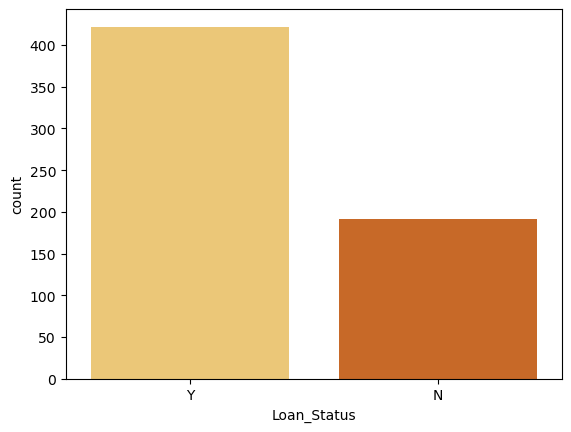

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%


In [62]:
sns.countplot(x="Loan_Status", data=data, palette="YlOrBr")
plt.show()

data.Loan_Status.value_counts(dropna=False)

countY = len(data[data.Loan_Status == 'Y'])
countN = len(data[data.Loan_Status == 'N'])
countNull = len(data[data.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(data.Loan_Status)) * 100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(data.Loan_Status)) * 100)))

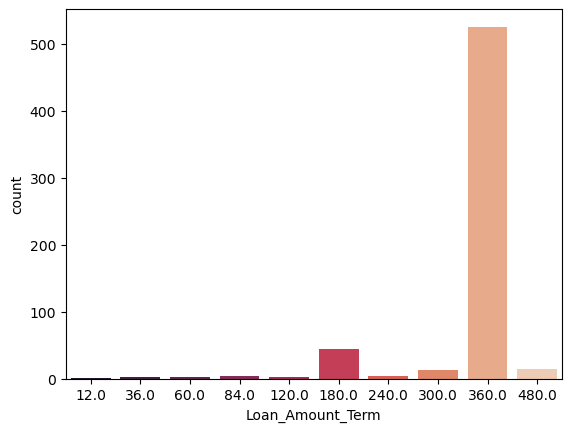

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [63]:
sns.countplot(x="Loan_Amount_Term", data=data, palette="rocket")
plt.show()

data.Loan_Amount_Term.value_counts(dropna=False)

In [65]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,84.037468
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,129.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


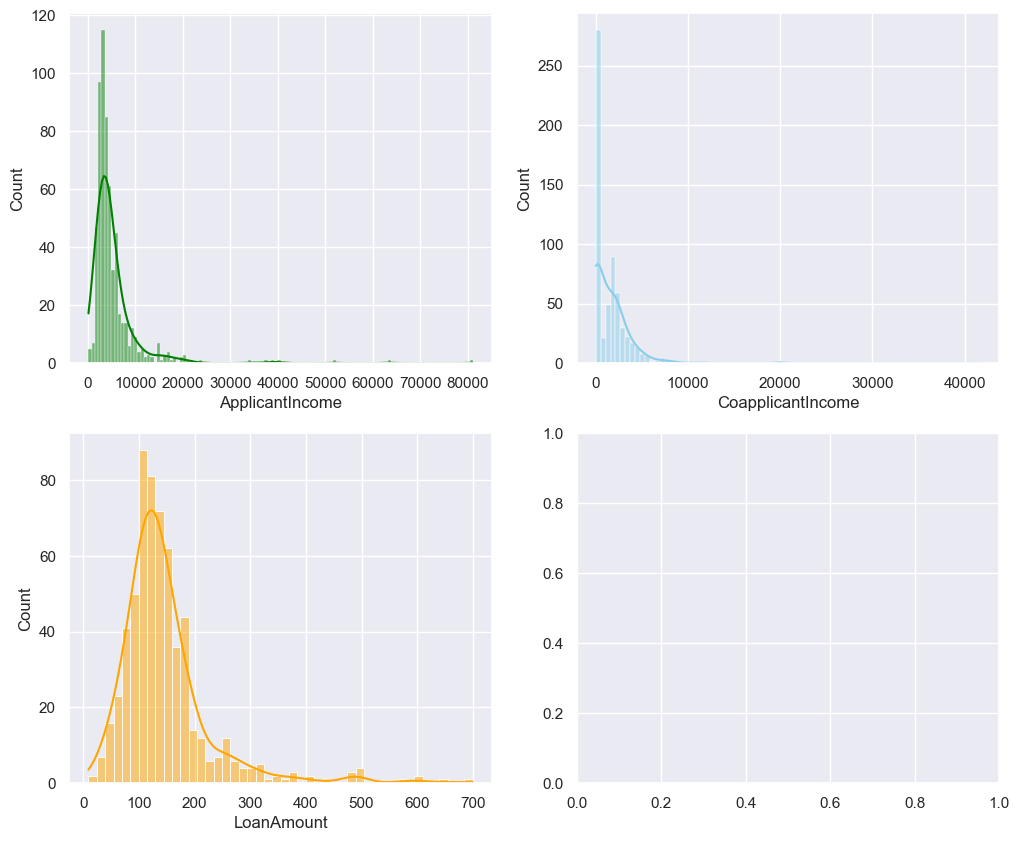

In [68]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data=data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

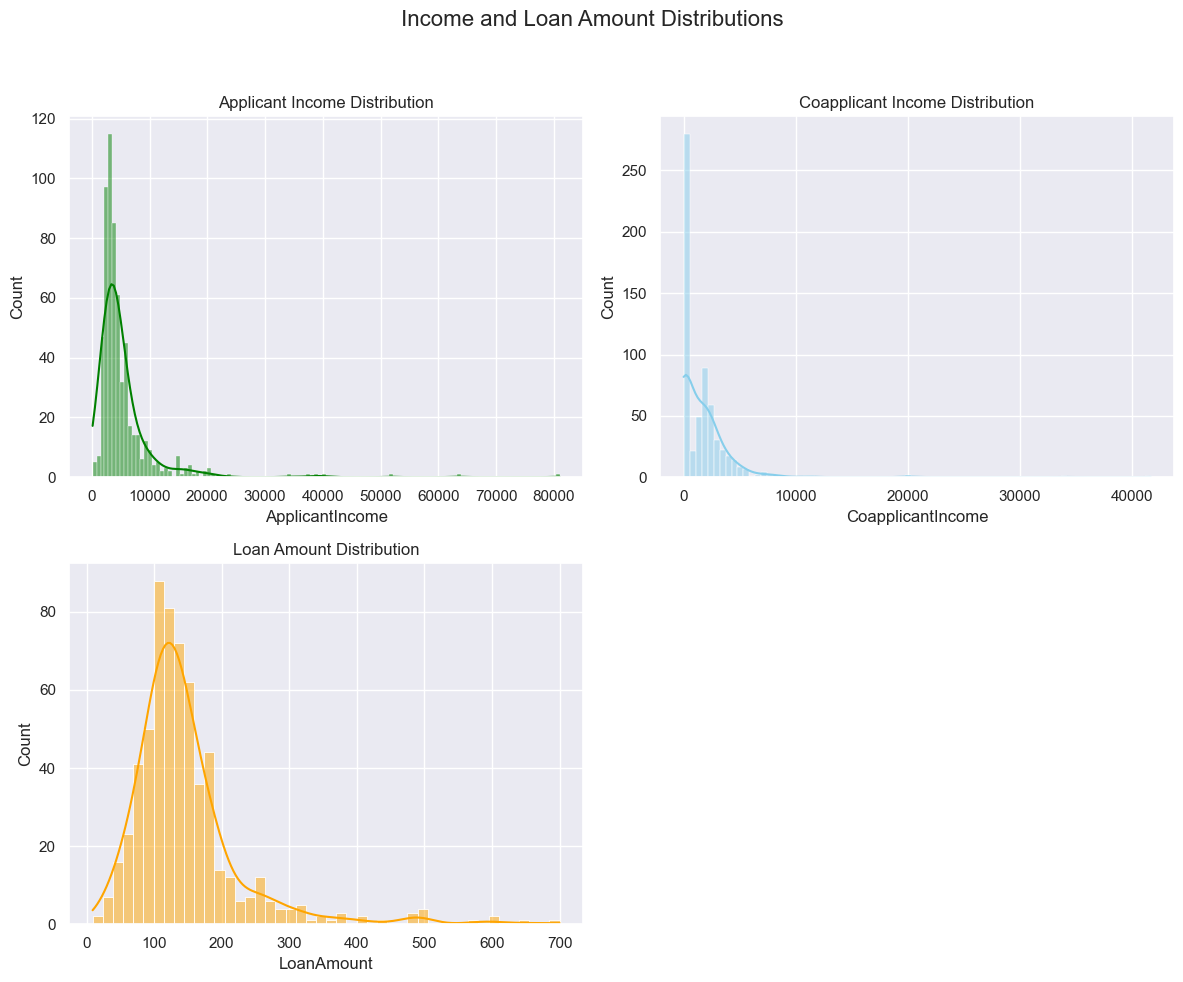

In [70]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data=data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
axs[0, 0].set_title('Applicant Income Distribution')

sns.histplot(data=data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title('Coapplicant Income Distribution')

sns.histplot(data=data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')
axs[1, 0].set_title('Loan Amount Distribution')
fig.suptitle('Income and Loan Amount Distributions', fontsize=16)

fig.delaxes(axs[1, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

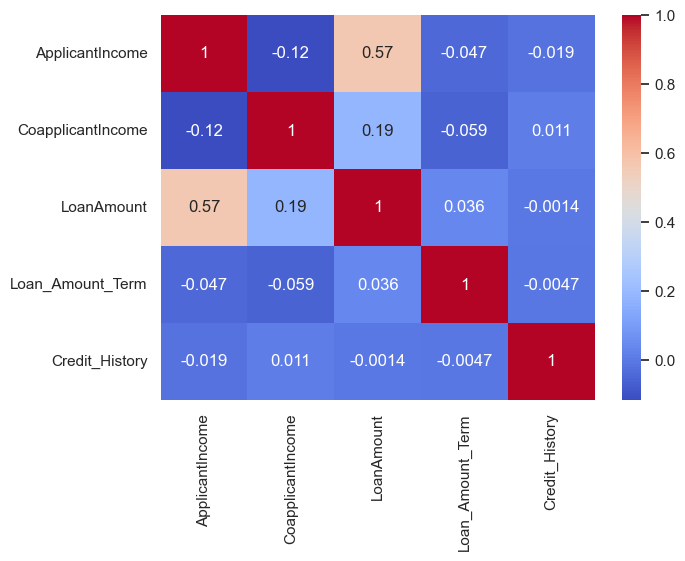

In [75]:
plt.figure(figsize=(7, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

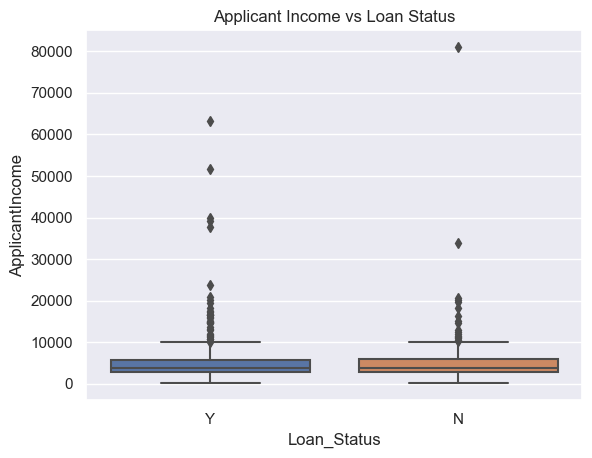

In [76]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data)
plt.title('Applicant Income vs Loan Status')
plt.show()

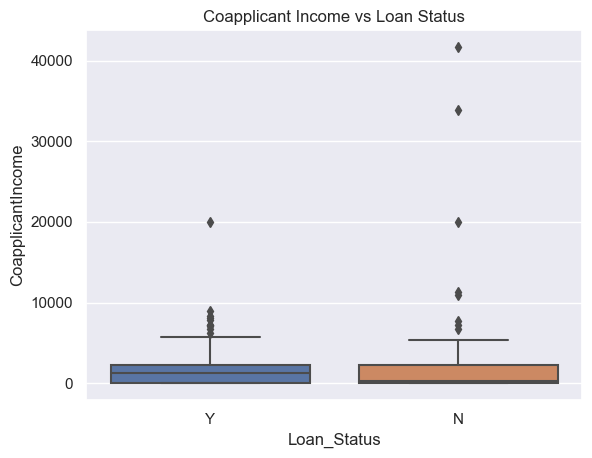

In [78]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=data)
plt.title('Coapplicant Income vs Loan Status')
plt.show()

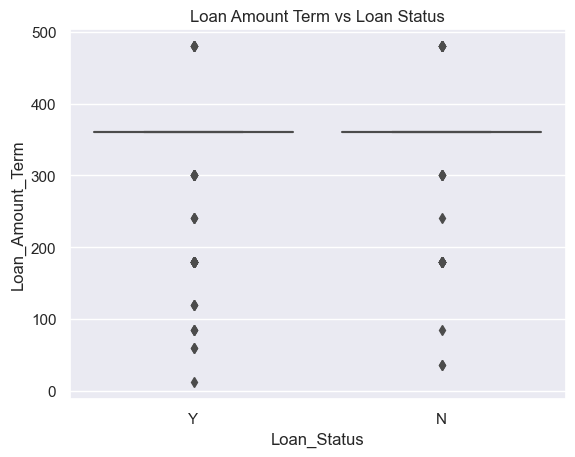

In [79]:
sns.boxplot(x='Loan_Status', y='Loan_Amount_Term', data=data)
plt.title('Loan Amount Term vs Loan Status')
plt.show()

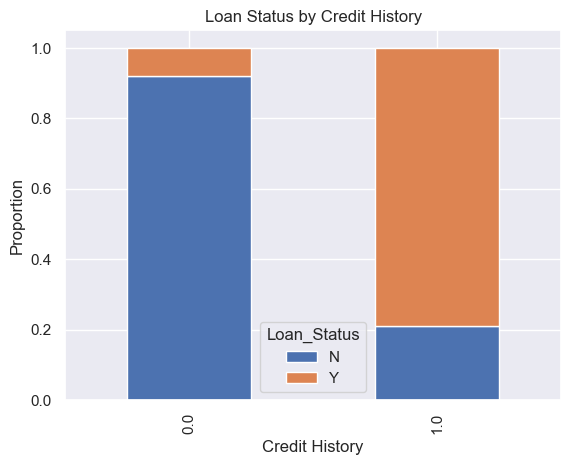

In [80]:
credit_history = pd.crosstab(data['Credit_History'], data['Loan_Status'])
credit_history.div(credit_history.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Proportion')
plt.show()

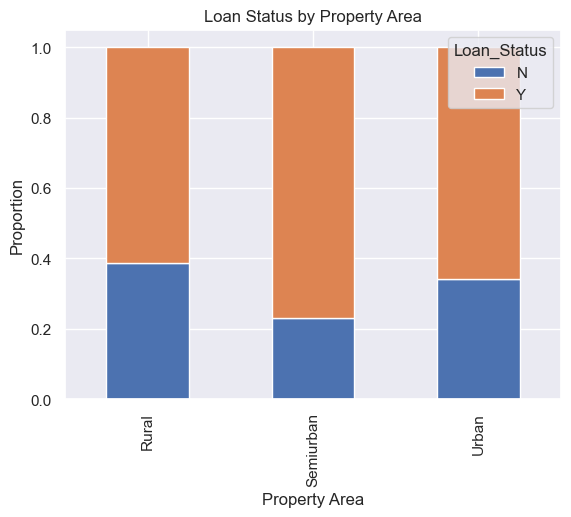

In [81]:
property_area = pd.crosstab(data['Property_Area'], data['Loan_Status'])
property_area.div(property_area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Proportion')
plt.show()

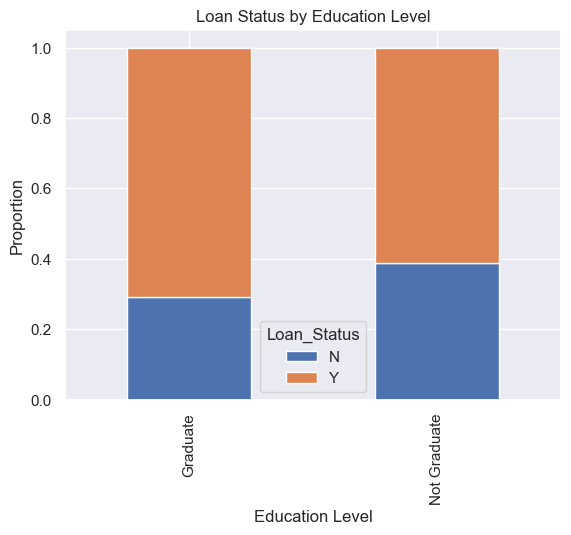

In [82]:
education_status = pd.crosstab(data['Education'], data['Loan_Status'])
education_status.div(education_status.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.show()

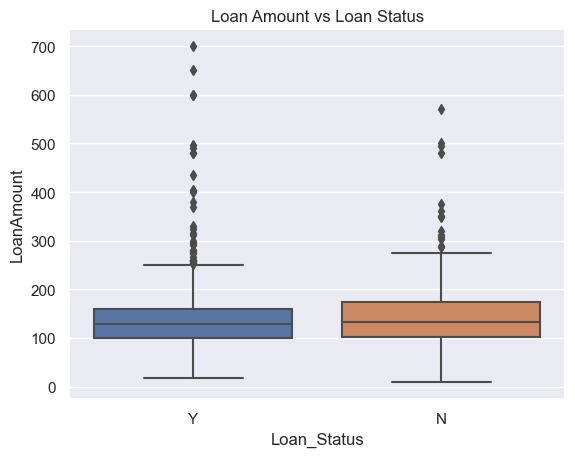

In [83]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=data)
plt.title('Loan Amount vs Loan Status')
plt.show()

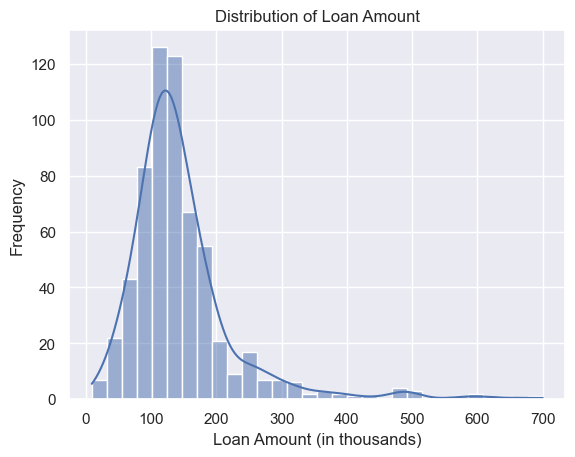

In [84]:
sns.histplot(data['LoanAmount'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount (in thousands)')
plt.ylabel('Frequency')
plt.show()

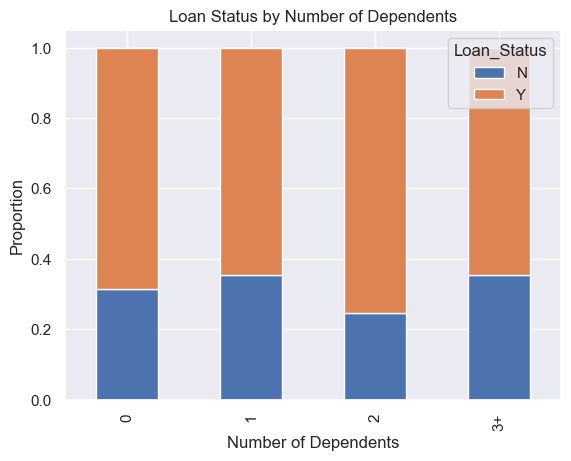

In [85]:
dependents_status = pd.crosstab(data['Dependents'], data['Loan_Status'])
dependents_status.div(dependents_status.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Proportion')
plt.show()

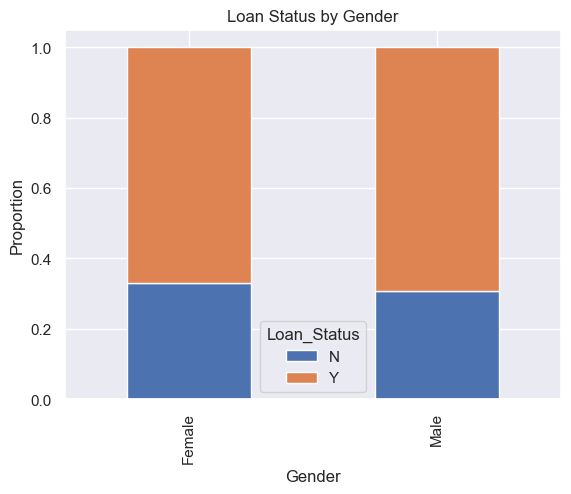

In [86]:
gender_status = pd.crosstab(data['Gender'], data['Loan_Status'])
gender_status.div(gender_status.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()

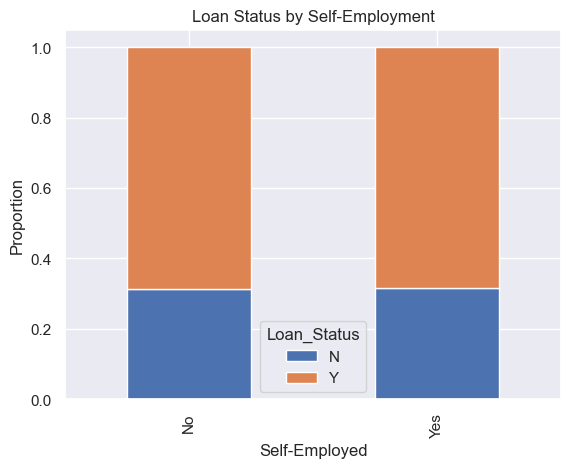

In [87]:
self_employed_status = pd.crosstab(data['Self_Employed'], data['Loan_Status'])
self_employed_status.div(self_employed_status.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Self-Employment')
plt.xlabel('Self-Employed')
plt.ylabel('Proportion')
plt.show()

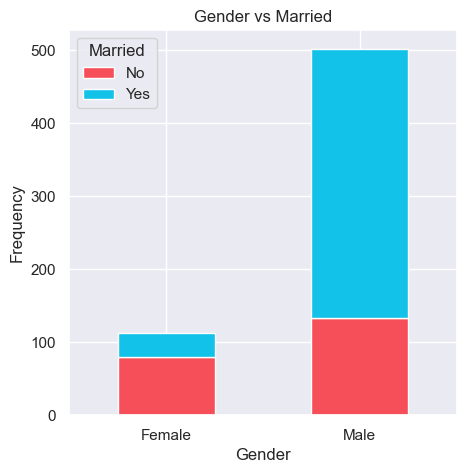

In [89]:
pd.crosstab(data.Gender,data.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

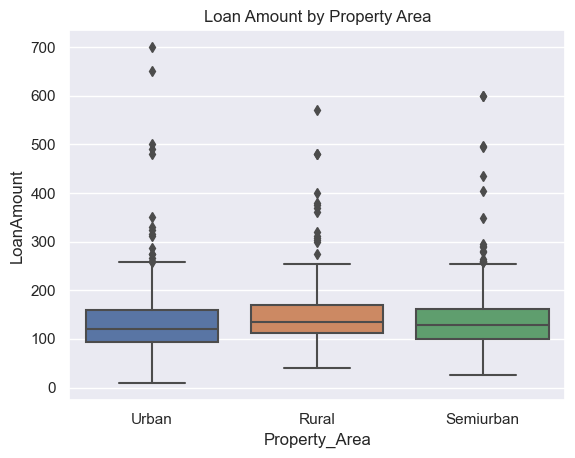

In [90]:
sns.boxplot(x='Property_Area', y='LoanAmount', data=data)
plt.title('Loan Amount by Property Area')
plt.show()

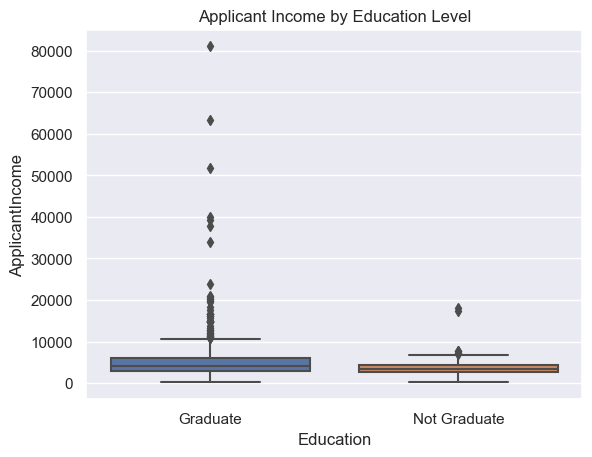

In [91]:
sns.boxplot(x='Education', y='ApplicantIncome', data=data)
plt.title('Applicant Income by Education Level')
plt.show()

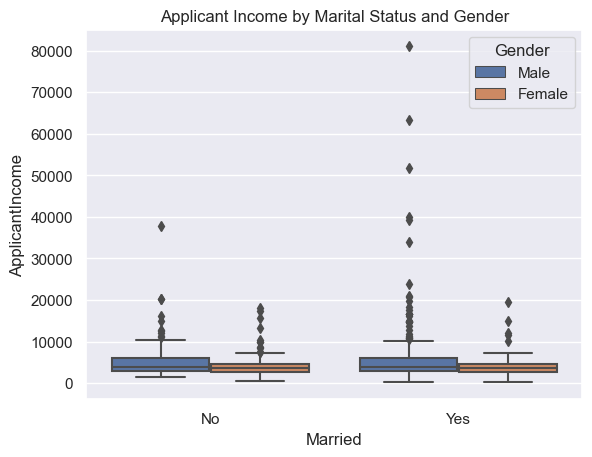

In [92]:
sns.boxplot(x='Married', y='ApplicantIncome', hue='Gender', data=data)
plt.title('Applicant Income by Marital Status and Gender')
plt.show()

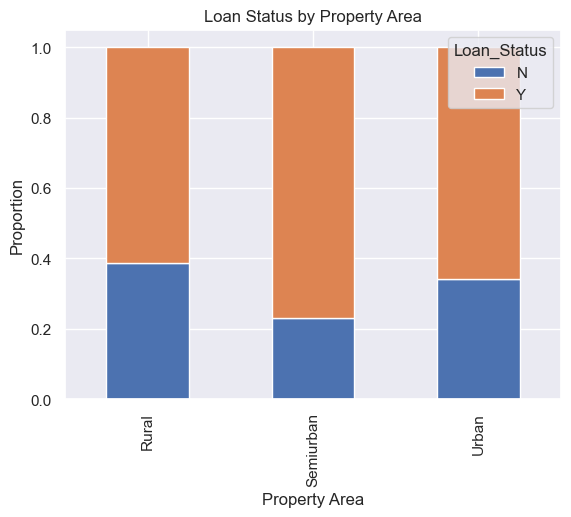

In [93]:
property_area_status = pd.crosstab(data['Property_Area'], data['Loan_Status'])
property_area_status.div(property_area_status.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Proportion')
plt.show()

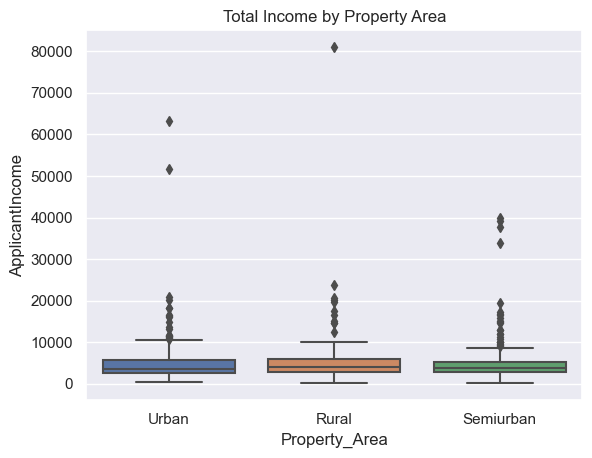

In [96]:
sns.boxplot(x='Property_Area', y='ApplicantIncome', data=data)
plt.title('Total Income by Property Area')
plt.show()

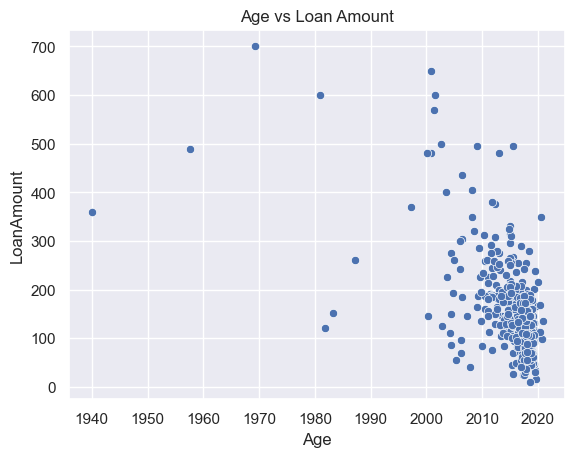

In [97]:
data['Age'] = 2021 - data['ApplicantIncome'] / 1000 

# Scatter plot de l'âge et du montant du prêt
sns.scatterplot(x='Age', y='LoanAmount', data=data)
plt.title('Age vs Loan Amount')
plt.show()

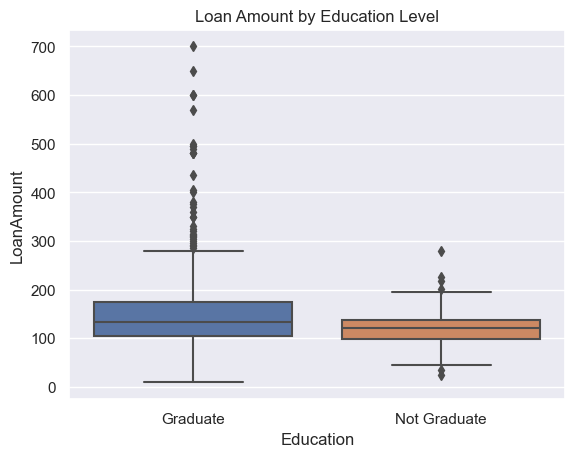

In [98]:
sns.boxplot(x='Education', y='LoanAmount', data=data)
plt.title('Loan Amount by Education Level')
plt.show()

In [17]:
to_numeric = {
    'Male': 1, 'Female': 2,
    'Yes': 1, 'No': 2,
    'Graduate': 1, 'Not Graduate': 2,
    'Urban': 3, 'Semiurban': 2, 'Rural': 1,
    'Y': 1, 'N': 0,
    '3+': 3
}

In [18]:
data = data.applymap(lambda label: to_numeric.get(label) if label in to_numeric else label)

In [19]:
data['Dependents'] = pd.to_numeric(data['Dependents'])

In [20]:
print(data.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [21]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)


y_predict = DT.predict(X_test)


print(classification_report(y_test, y_predict))


DT_SC = accuracy_score(y_predict, y_test)
print(f"{round(DT_SC*100, 2)}% Accurate")

              precision    recall  f1-score   support

           0       0.57      0.53      0.55        43
           1       0.76      0.79      0.77        80

    accuracy                           0.70       123
   macro avg       0.67      0.66      0.66       123
weighted avg       0.69      0.70      0.70       123

69.92% Accurate


In [215]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123

76.42% Accurate


In [216]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.77      0.47      0.58        43
           1       0.76      0.93      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.70      0.71       123
weighted avg       0.77      0.76      0.75       123

76.42% Accurate


In [217]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

accuracy is 0.7886178861788617


C:\Users\fadik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [220]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.84      0.37      0.52        43
           1       0.74      0.96      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.67      0.68       123
weighted avg       0.78      0.76      0.72       123

[[16 27]
 [ 3 77]]
Categorical Naive Bayes accuracy: 75.61%


In [221]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123

[[19 24]
 [ 2 78]]
Gaussian Naive Bayes accuracy: 78.86%


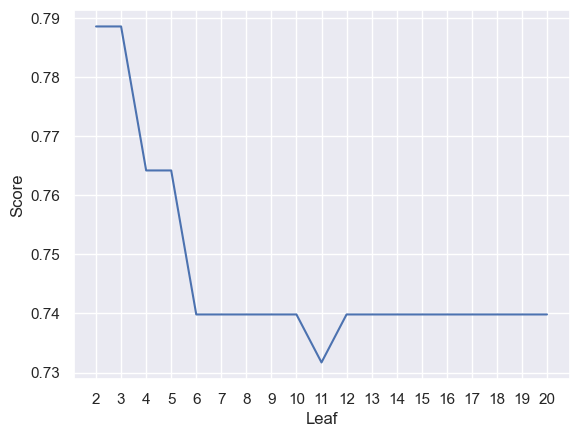

Decision Tree Accuracy: 78.86%


In [222]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

In [234]:
score = [DTAcc,RF_SC,XGB_SC,LR_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
0,Decision Tree,0.788618
3,Logistic Regression,0.788618
1,Random Forest,0.764228
2,XGBoost,0.764228


In [236]:
import joblib

In [237]:
# Save the trained model and the scaler
joblib.dump(DT, 'decision_tree_model.pkl')
joblib.dump(scalerX, 'scaler.pkl')

# Optionally, print the model accuracy
print("Model accuracy on test set: {:.2f}%".format(DT.score(X_test, y_test) * 100))

Model accuracy on test set: 69.92%


In [238]:
import sklearn
print(sklearn.__version__)

1.0.2


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [32]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

RF = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_RF = grid_search.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [33]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [34]:
y_predict = best_RF.predict(X_test)

In [35]:
print(classification_report(y_test, y_predict))
DT_SC = accuracy_score(y_predict, y_test)
print(f"{round(DT_SC*100, 2)}% Accurate")

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

78.05% Accurate
